## Análise de Dados da Educação no Brasil

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_enem = pd.read_csv('MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
display(df_enem)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,...,A,A,A,B,A,A,D,A,B,B
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,...,A,A,A,B,A,A,D,A,B,B
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,...,A,A,A,A,A,A,B,A,A,B
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,...,A,A,A,B,A,A,C,A,A,A


### Número de inscrições por unidade federativa

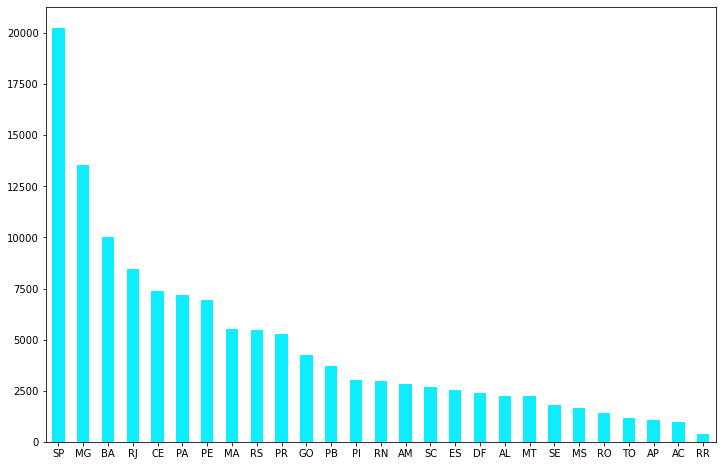

In [15]:
plt.figure(figsize = (12, 8))
df_enem.SG_UF_RESIDENCIA.value_counts(ascending = False).plot(kind = 'bar', color = '#0EEEFF')
plt.gca().tick_params(axis = 'x', rotation = 0)

Como podemos observar, a amostragem condiz com a realidade?

### Distribuição dos dados de acordo com a idade dos inscritos

In [17]:
df_enem.NU_IDADE.value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [18]:
df_enem.NU_IDADE.value_counts(normalize = True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

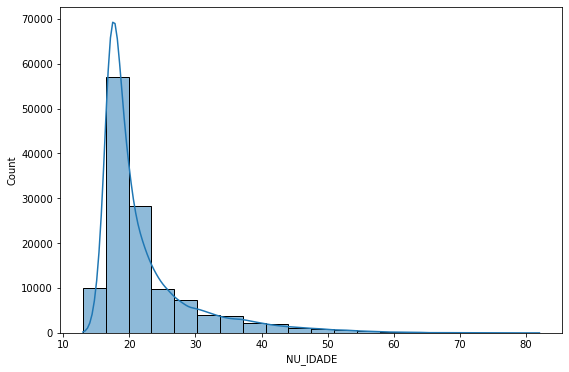

In [34]:
fig = plt.figure(figsize = (9, 6))
sns.histplot(x = 'NU_IDADE', data = df_enem, bins =20)

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

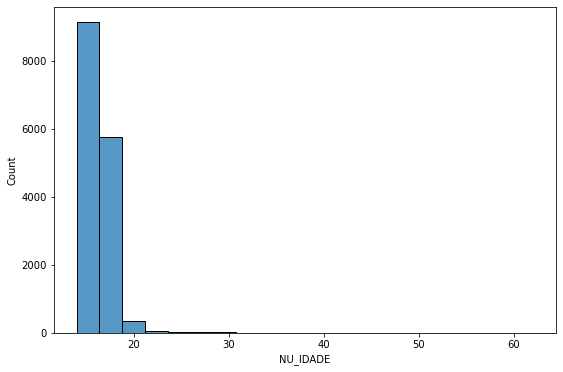

In [37]:
fig = plt.figure(figsize = (9, 6))
sns.histplot(x = 'NU_IDADE', data = df_enem.query('IN_TREINEIRO == 1'), bins = 20)

<AxesSubplot:xlabel='NU_IDADE', ylabel='Proportion'>

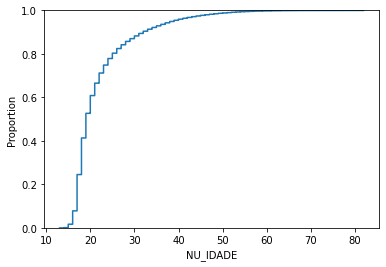

In [26]:
sns.ecdfplot(x = 'NU_IDADE', data = df_enem)

### Medidas estatísticas para a nota de cada uma das provas

<AxesSubplot:>

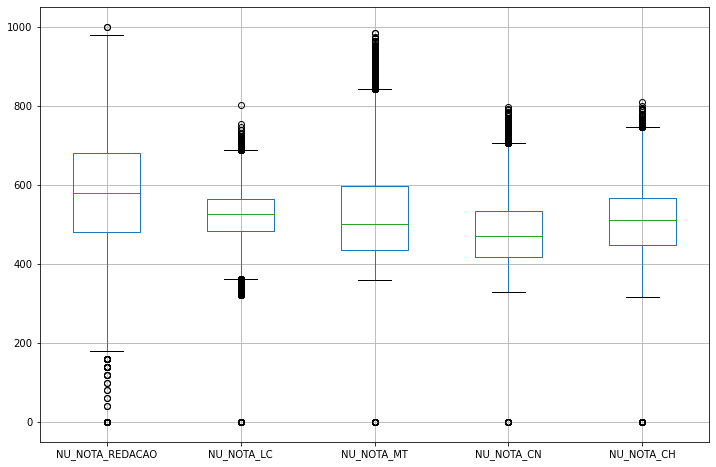

In [38]:
provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']
df_enem[provas].boxplot(figsize = (12, 8))